# Ad Campaign Performance: Exploratory Data Analysis
The Ad Campaign Performance project conducts an A/B hypothesis testing on an Ad campaign. During the Ad campaign, SmartAd, a mobile first advertising company is running an online Ad for brand Lux.  SmartAd company runs two versions of an Ad, a creative Ad which was presented to the exposed group and a dummy Ad which was presented to the control group. The main objective of the project is to determine through A/B hypothesis testing whether the creative Ad results to a significant lift in the brand awareness. This notebook conducts an exploratory data analysis on the data generated during the campaign. The data used in this notebook can be found <em><a src="../data/AdSmartABdata.csv">here</a></em>

## Import the required packages

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

## Load the data 
We load the data from the csv file into a pandas DataFrame. We will use the LoadData class defined in the load_data module


In [3]:
#import LoadData class for loading the data
import sys
sys.path.append('../scripts')
from load_data import LoadData


In [4]:
loader = LoadData()
ad_df = loader.read_csv('../data/AdSmartABdata.csv')
ad_df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


## Exploratory Data Analysis

##### Check the shape of the DataFrame

In [6]:
ad_df.shape

(8077, 9)

In [11]:
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


The data loaded has 8077 rows and 9 columns

#### Check the columns available in the data

In [7]:
ad_df.columns.tolist()

['auction_id',
 'experiment',
 'date',
 'hour',
 'device_make',
 'platform_os',
 'browser',
 'yes',
 'no']

The 9 columns in the dataset are:
    <b>
        <ol>
            <li>auction-id</li>
            <li>experiment</li>
            <li>date</li>
            <li>hour</li>
            <li>device_make</li>
            <li>platform_os</li>
            <li>browser</li>
            <li>yes</li>
            <li>no</li>
        </ol>
    </b>

#### Check the column types

In [8]:
ad_df.dtypes

auction_id     object
experiment     object
date           object
hour            int64
device_make    object
platform_os     int64
browser        object
yes             int64
no              int64
dtype: object

#### Check if the data has missing values

In [9]:
ad_df.isna().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

The data has no missing values

### Univariete analysis and visualization
We conduct a univariate analysis on categorical columns and visualize the data in them

In [13]:
#Determine the numerical and categorical data
numerical_column = ad_df.select_dtypes(exclude="object").columns.tolist()
categorical_column = ad_df.select_dtypes(include="object").columns.tolist()
print("Numerical Columns:", numerical_column)
print("****************")
print("Categorical Columns:", categorical_column)

Numerical Columns: ['hour', 'platform_os', 'yes', 'no']
****************
Categorical Columns: ['auction_id', 'experiment', 'date', 'device_make', 'browser']


##### browser column

In [74]:
plot_df= copy.deepcopy(ad_df)
ad_df['browser'].value_counts()

Chrome Mobile                 4554
Chrome Mobile WebView         1489
Samsung Internet               824
Facebook                       764
Mobile Safari                  337
Chrome Mobile iOS               51
Mobile Safari UI/WKWebView      44
Pinterest                        3
Chrome                           3
Opera Mobile                     3
Android                          1
Edge Mobile                      1
Firefox Mobile                   1
Puffin                           1
Opera Mini                       1
Name: browser, dtype: int64

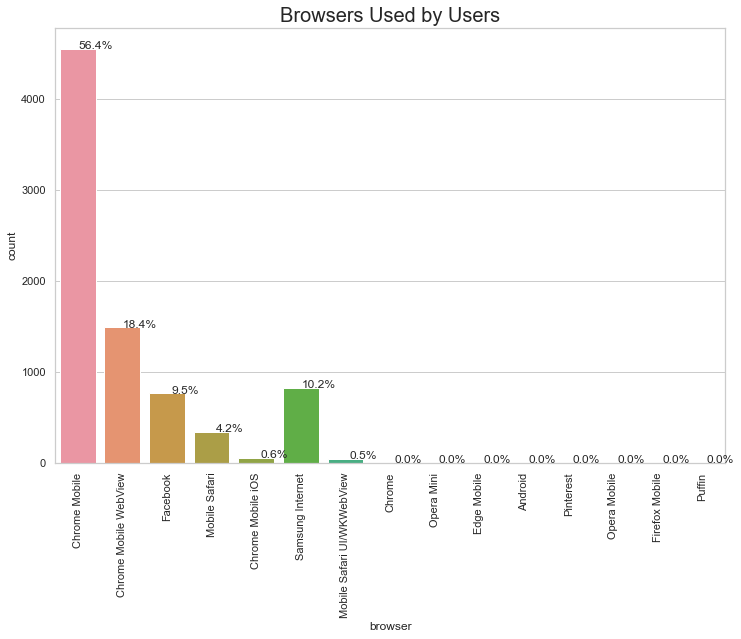

In [75]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
total = float(len(ad_df))
ax = sns.countplot(x="browser", data=ad_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Browsers Used by Users', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- 56.4% of the users used Chrome Mobile browser to view the BIO questionnaire, 18.4% used Chrome Mobile WebView, 10.2% used Samsung Internet, 9.5% used Facebook, 4.2% used Mobile Safari , 0.6% used Chrome Mobile OS, and 0.5% used Mobile Safari UI/WKWebView. 

- The Chrome, Opera Mini, Edge Mobile, Android, Pinterest, Opera Mobile, Firefox Mobile and Puffin all had 0.0% users

##### Top 10 Devices Used by Users

In [36]:
plot_df['device_make'].value_counts().head(10)

Generic Smartphone    4743
iPhone                 433
Samsung SM-G960F       203
Samsung SM-G973F       154
Samsung SM-G950F       148
Samsung SM-G930F       100
Samsung SM-G975F        97
Samsung SM-A202F        88
Samsung SM-A405FN       87
Samsung SM-J330FN       69
Name: device_make, dtype: int64

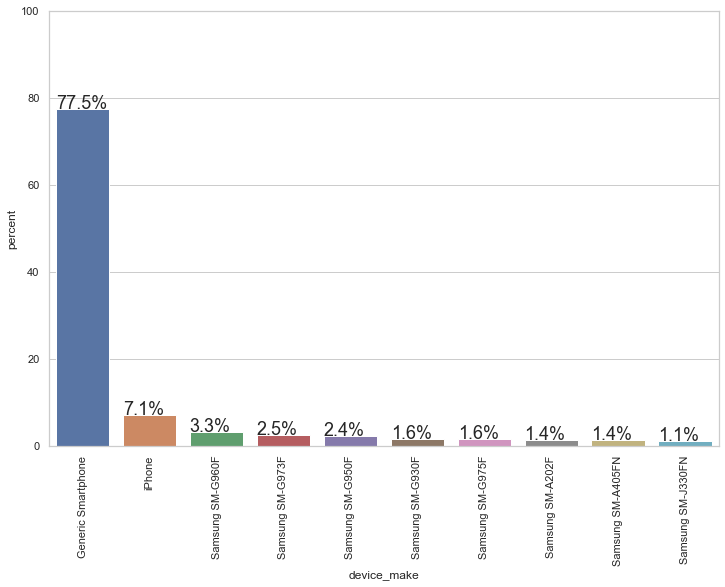

In [72]:
#create a df for top 10 devices and their value counts
device_make_df = pd.DataFrame(plot_df['device_make'].value_counts().head(10).rename_axis('device_make').reset_index(name='counts'))

#calculate the percentage of each device
device_make_df['percent'] = (device_make_df['counts']/device_make_df['counts'].sum())*100
device_make_df.sort_values(by='percent', ascending=False, inplace = True)

# Plot the figure
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12,8))
ax = sns.barplot(x='device_make', y='percent',  data=device_make_df)
sns.set(font_scale=1.5)
ax.set_ylim(0,100)

#Add percentages on each bar
for p in ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    ax.text(txt_x,txt_y,txt)
    
#rotate the x-labels to 90 degrees for clear visualization
g = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Generic Smartphones were the most used devices at 77.5% and Iphone aw 7.1%

##### Distribution by Date

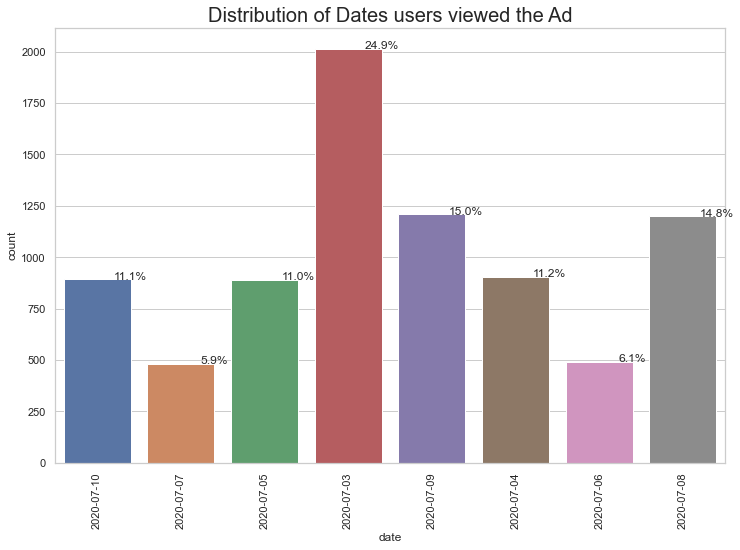

In [76]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
total = float(len(ad_df))
ax = sns.countplot(x="date", data=ad_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Distribution of Dates users viewed the Ad', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

03/07/2020 was the most engaged day during the campaign. This was the first day of the campaign. It has 24.9% of the engagements.

##### Distribution of Users in each group

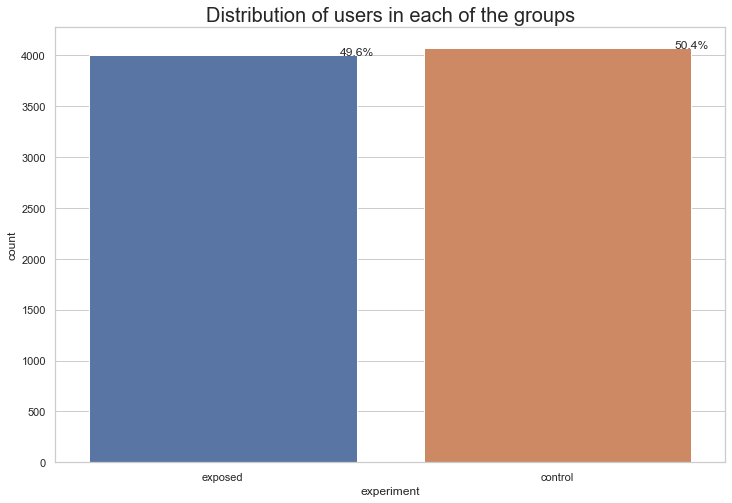

In [79]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
total = float(len(ad_df))
ax = sns.countplot(x="experiment", data=ad_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title('Distribution of users in each of the groups', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

50.4% of the users were place in the control group while 49.6% of the users were placed i the exposed group

##### Number of yes and no (conversion rate)in both the control and the exposed groups

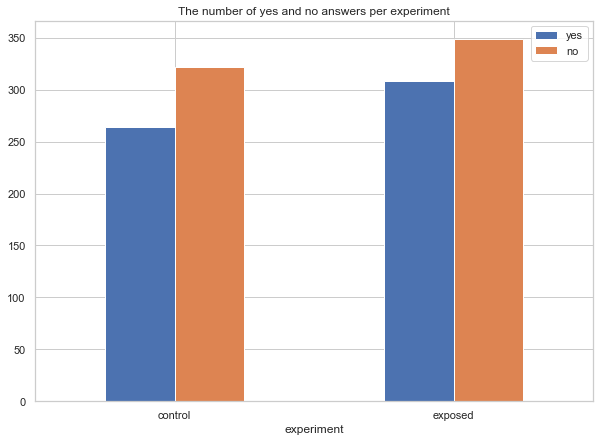

In [80]:
yes_no_agg = plot_df.groupby('experiment').agg({'yes': 'sum', 'no': 'sum'})
ax = yes_no_agg.plot.bar( y=['yes', 'no'],  title="The number of yes and no answers per experiment",
                          rot=0, figsize=(10,7))

The number of yes in the exposed group is slighlty higher than the number of yes in the control group.
We cannot conclude that the creative Ad has resulted in increaded awareness of the brand Lux. To conclude whether the creative Ad has brought about an 
increase in brand awareness, we have to consider other metrics such as the Base Conversion rate (BCR), the minimum detectable effect (MDE)
and the statistical significance level